In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [62]:
df=pd.read_csv('data.csv')

In [63]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,10.0,0,0,No Info,16.83,4.0,155,0
1,Female,3.0,0,0,No Info,27.32,3.5,126,0
2,Female,42.0,0,0,never,24.69,5.0,140,0
3,Female,70.0,0,0,never,27.32,4.5,159,0
4,Female,20.0,0,0,never,18.51,4.8,80,0


In [64]:
print(df.shape)

(16964, 9)


In [65]:
#Xay dung mo hinh
features=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']

X=df[features]
y=df['diabetes']

In [66]:
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Xử lý One-Hot Encoding cho các cột chuỗi
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [68]:
# Đảm bảo các cột của tập kiểm tra khớp với tập huấn luyện
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [69]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [70]:
# Tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [71]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

In [72]:
# Hiển thị kết quả so sánh thực tế và dự đoán
dfLG = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSo sánh kết quả thực tế và dự đoán (15 hàng đầu tiên):")
print(dfLG.head(15))



So sánh kết quả thực tế và dự đoán (15 hàng đầu tiên):
    Actual  Predicted
0        1          1
1        0          0
2        1          1
3        0          0
4        1          1
5        0          0
6        1          1
7        0          0
8        0          0
9        1          1
10       0          0
11       0          0
12       1          1
13       1          1
14       1          0


In [73]:
# Dự đoán trên dữ liệu gốc
X_encoded = pd.get_dummies(X)
X_encoded = X_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_scaled = scaler.transform(X_encoded)

In [74]:
# Dự đoán lớp và xác suất
predictions_on_original_data = model.predict(X_scaled)
probabilities_on_original_data = model.predict_proba(X_scaled)

In [75]:

print("\nDự đoán trên dữ liệu gốc:")
print(f"Lớp dự đoán:\n{predictions_on_original_data}")
print(f"Xác suất dự đoán:\n{probabilities_on_original_data}")


Dự đoán trên dữ liệu gốc:
Lớp dự đoán:
[0 0 0 ... 1 1 1]
Xác suất dự đoán:
[[9.99784042e-01 2.15957567e-04]
 [9.99956200e-01 4.37995507e-05]
 [9.85705600e-01 1.42944001e-02]
 ...
 [9.75634647e-03 9.90243654e-01]
 [8.55430157e-03 9.91445698e-01]
 [4.74175346e-02 9.52582465e-01]]


In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8847627468317123


In [77]:
# Đánh giá mô hình trên tệp kiểm tra
classifiacation_report = classification_report(y_test, y_pred)
# In ra các độ đo hiệu suất
print("Đánh giá mô hình trên tập kiểm tra: ")
print(classifiacation_report)

Đánh giá mô hình trên tập kiểm tra: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1707
           1       0.89      0.87      0.88      1686

    accuracy                           0.88      3393
   macro avg       0.88      0.88      0.88      3393
weighted avg       0.88      0.88      0.88      3393



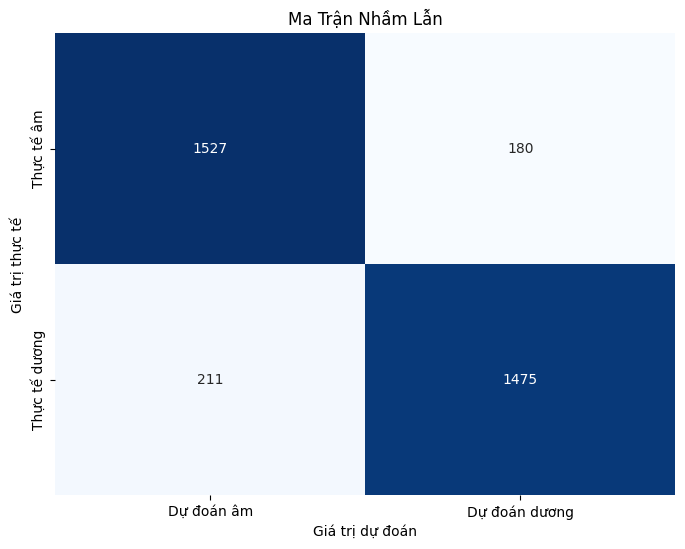

In [78]:
# Tạo dự đoán từ mô hình
y_pred = model.predict(X_test_scaled)

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Chuyển ma trận nhầm lẫn thành DataFrame để dễ hiển thị
cm_df = pd.DataFrame(cm, index=['Thực tế âm', 'Thực tế dương'], columns=['Dự đoán âm', 'Dự đoán dương'])

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ma Trận Nhầm Lẫn')
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')
plt.show()


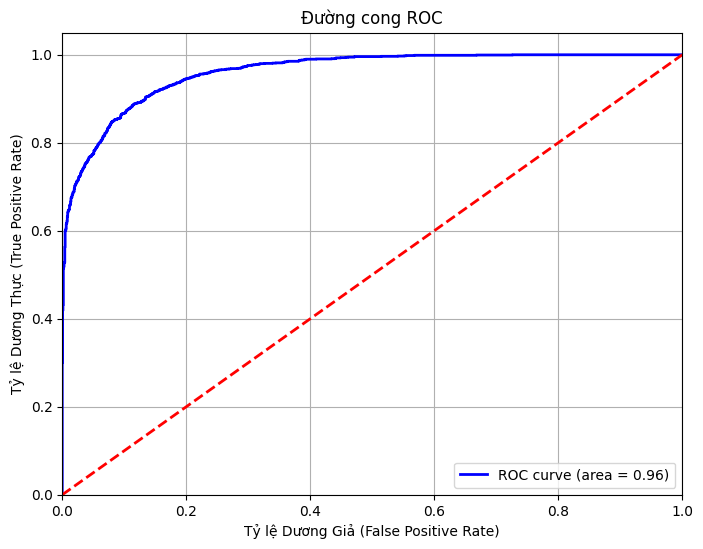

In [79]:
# Dự đoán xác suất cho tập kiểm tra
probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Chọn xác suất cho lớp dương

# Tính TPR và FPR
fpr, tpr, thresholds = roc_curve(y_test, probabilities)  # y_test là nhãn thực tế

# Tính diện tích dưới đường cong (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Đường chéo
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ Dương Giả (False Positive Rate)')
plt.ylabel('Tỷ lệ Dương Thực (True Positive Rate)')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

